# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos), y calcular estadísticas descriptivas de las columnas numéricas.

### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.



In [118]:
# IMPORTACIONES:
import pandas as pd
import matplotlib.pyplot as plt

## Ejercicio 1: Importación del dataset con Pandas

- Nos conectamos al data set usando "pd.read_csv()"
- Con "index_col=False" le decimos que no nos cree una columna de índices.
- Con "df.head()" imprimimos las 5 primeras filas del dataset.

In [119]:
df = pd.read_csv('datasets_calificaciones.csv', index_col=False)
df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8,7.5,9,95%
1,carlos lópez,fisica,6.2,7,NaN,88%
2,maría gómez,quimica,9,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6,7,75
4,laura vargas,matematicas,,9.2,8.5,92%


## Ejercicio 2: Exploración inicial de los datos

- Usando "df.info()" imprimimos las estadísticas de las columnas.
- Con "df.isnull().sum()" sabemos cuantos campos vacíos tiene cada columna. 

In [120]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   estudiante  100 non-null    object
 1   Materia     100 non-null    object
 2   Parcial 1   95 non-null     object
 3   Parcial 2   90 non-null     object
 4   Final       89 non-null     object
 5   Asistencia  100 non-null    object
dtypes: object(6)
memory usage: 4.8+ KB


estudiante     0
Materia        0
Parcial 1      5
Parcial 2     10
Final         11
Asistencia     0
dtype: int64

## Ejercicio 3: Limpieza y normalización de los datos

### Conversión de columnas numéricas:

- Seleccionamos las columnas que deberían ser numéricas y las convertimos en numéricas usando "pd.to_numeric". Con "errors='coerce'" forzamos a que si se encuentra un campo vacío, entonces se agregue "NaN".
- Con "df.info()" y "df.head()" comprobamos que haya salido bien.

In [121]:
df["Parcial 1"] = pd.to_numeric(df["Parcial 1"], errors='coerce')
df["Parcial 2"] = pd.to_numeric(df["Parcial 2"], errors='coerce')
df["Final"] = pd.to_numeric(df["Final"], errors='coerce')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estudiante  100 non-null    object 
 1   Materia     100 non-null    object 
 2   Parcial 1   88 non-null     float64
 3   Parcial 2   88 non-null     float64
 4   Final       85 non-null     float64
 5   Asistencia  100 non-null    object 
dtypes: float64(3), object(3)
memory usage: 4.8+ KB


,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8.0,7.5,9.0,95%
1,carlos lópez,fisica,6.2,7.0,NaN,88%
2,maría gómez,quimica,9.0,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6.0,7.0,75
4,laura vargas,matematicas,NaN,9.2,8.5,92%


### Rellenar datos faltantes en las filas numéricas

- Si hay campos con "NaN" entonces seleccionamos la columna, sacamos el promedio de esa columna con ".mean()", insertamos el promedio en los campos vacíos con ".fillna()" y limitamos a 2 decimales con ".round(2)". 

In [122]:
df["Parcial 1"] = df["Parcial 1"].fillna(df["Parcial 1"].mean()).round(2)
df["Parcial 2"] = df["Parcial 2"].fillna(df["Parcial 2"].mean()).round(2)
df["Final"] = df["Final"].fillna(df["Final"].mean()).round(2) 

df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8.00,7.5,9.00,95%
1,carlos lópez,fisica,6.20,7.0,7.89,88%
2,maría gómez,quimica,9.00,8.8,9.50,100%
3,pedro rodríguez,historia,7.50,6.0,7.00,75
4,laura vargas,matematicas,7.83,9.2,8.50,92%


### Conversión de la columna de asistencia

- Se borra el símbolo del porcentaje de todas las filas de la columna "Asistencia" usando ".str.replace("%", "").
- Convertimos el tipo de dato a numérico con ".astype(int)".
- Luego con ".clip(100, upper=True)" le decimos que el porcentaje no puede sobrepasar los 100, si es mayor a 100, entonces se redondea a 100 exacto y con ".astype(str)" lo convertimos a String otra vez para concatenar el símbolo de porcentaje.

In [123]:
df["Asistencia"] = df["Asistencia"].str.replace("%", "").astype(int)
df["Asistencia"] = df["Asistencia"].clip(100, upper=True).astype(str) + "%" 
df.head(5)

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8.00,7.5,9.00,95%
1,carlos lópez,fisica,6.20,7.0,7.89,88%
2,maría gómez,quimica,9.00,8.8,9.50,100%
3,pedro rodríguez,historia,7.50,6.0,7.00,75%
4,laura vargas,matematicas,7.83,9.2,8.50,92%


### Capitalizar las columnas "Estudiante" y "Materia"

- Con "df.rename(columns={"estudiante": "Estudiante"})" hacemos que el nombre de la columna "estudiante" pase a tener la primer "e" en mayúscula (Estudiante).
- Con el método ".str.title()" hacemos que que cada palabra de cada fila de las dos columnas seleccionadas empiecen con mayúscula.

In [124]:
df = df.rename(columns={"estudiante": "Estudiante"})
df["Estudiante"] = df["Estudiante"].str.title()
df["Materia"] = df["Materia"].str.title()
df.head()

,Estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.00,7.5,9.00,95%
1,Carlos López,Fisica,6.20,7.0,7.89,88%
2,María Gómez,Quimica,9.00,8.8,9.50,100%
3,Pedro Rodríguez,Historia,7.50,6.0,7.00,75%
4,Laura Vargas,Matematicas,7.83,9.2,8.50,92%


## Ejercicio 4: Obtención de estadísticas descriptivas

- Obtenemos nuevamente la descripción de cada columna para ver si se logró normalizar el dataset.

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Estudiante  100 non-null    object 
 1   Materia     100 non-null    object 
 2   Parcial 1   100 non-null    float64
 3   Parcial 2   100 non-null    float64
 4   Final       100 non-null    float64
 5   Asistencia  100 non-null    object 
dtypes: float64(3), object(3)
memory usage: 4.8+ KB


## 5. Visualización de los Datos con Matplotlib

### Realizamos los histogramas para las columnas de Parcial 1, Parcial 2 y Final.

- Con "plt.figure(figsize=(12, 4))" le estamos diciendo que los histogramas van a medir 12 pulgadas de ancho y 4 de alto.
- Con "plt.subplot("fila", "columnas", "posicion")" especificamos cuantas filas, columnas y en que posición estará el gráfico al que se la aplique.
- En "plt.hist(df["columna X"].dropna(), bins=10, color='skyblue', edgecolor='black')" seleccionamos la columna de la cual haremos el gráfico, eliminamos posibles campos vacíos (".dropna()"), especificamos la cantidad de barras (bins), el color de las barras (color) y el color del contorno de las barras (edgecolor).
- "plt.title ("texto")": Será el titulo del gráfico.
- "plt.xlabel("texto"): Será el texto en el eje X del gráfico.
- "plt.ylabel("texto"): Será el texto en el eje Y del gráfico.

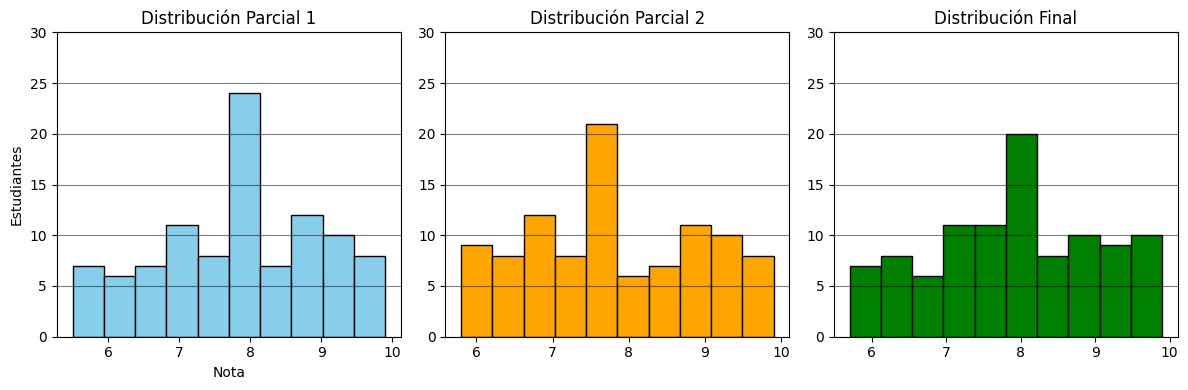

In [131]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df['Parcial 1'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.yticks(range(0, 35, 5))
plt.grid(axis='y', linestyle='-', alpha=0.5, color='black')
plt.title('Distribución Parcial 1')
plt.xlabel('Nota')
plt.ylabel('Estudiantes')

plt.subplot(1, 3, 2)
plt.hist(df['Parcial 2'].dropna(), bins=10, color='orange', edgecolor='black')
plt.yticks(range(0, 35, 5))
plt.grid(axis='y', linestyle='-', alpha=0.5, color='black')
plt.title('Distribución Parcial 2')

plt.subplot(1, 3, 3)
plt.hist(df['Final'].dropna(), bins=10, color='green', edgecolor='black')
plt.yticks(range(0, 35, 5))
plt.grid(axis='y', linestyle='-', alpha=0.5, color='black')
plt.title('Distribución Final')

plt.tight_layout()
plt.show()


### Realizamos el histograma de asistencia.

- En "Asistencia_num = df["Asistencia"]" creamos una serie numérica temporal a partir de la columna "Asistencia".

- Se elimina el símbolo % con ".str.replace("%", "")".

- Se convierte a entero con ".astype(int)".

Esto se hace para poder trabajar con datos numéricos en el gráfico, sin modificar el DataFrame original.

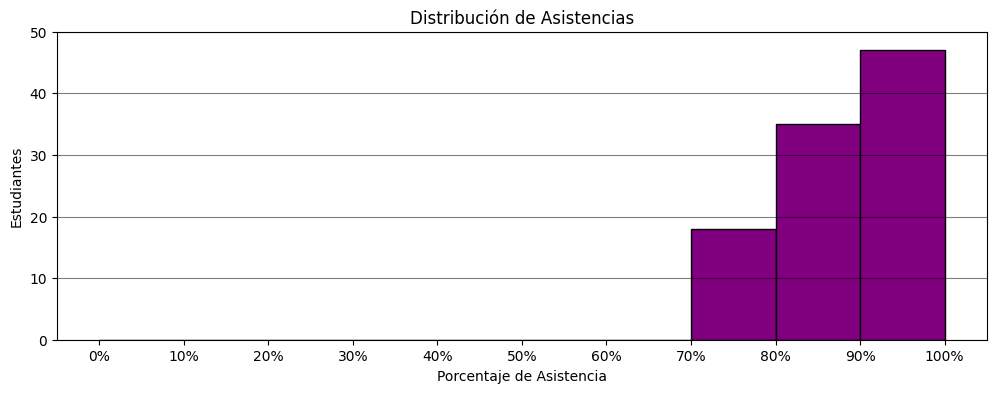

In [134]:
Asistencia_num = df["Asistencia"].str.replace("%", "").astype(int)

plt.figure(figsize=(12, 4))
plt.hist(Asistencia_num, bins=range(0, 110, 10), color='purple', edgecolor='black')
plt.title('Distribución de Asistencias')
plt.xlabel('Porcentaje de Asistencia')
plt.ylabel('Estudiantes')
plt.yticks(range(0, 60, 10))
plt.xticks(range(0, 110, 10), [f"{i}%" for i in range(0, 110, 10)])
plt.grid(axis='y', linestyle='-', alpha=0.5, color='black')
plt.show()
